# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$ f(x) = ||Ax-y||^2 = (Ax-y)^T(Ax-y) $$
$$ D_f(x) = D<Ax-y,Ax-y> $$
$$ = <Ax-y,D(Ax-y)> + <D(Ax-y),Ax-y> $$
$$ = 2<Ax-y,D(Ax-y)> = 2(Ax-y)^T Adx $$
$$ D_f(x) = <(2(Ax-y)^T A)^T, dx> $$
$$ \nabla f(x) = 2A^T(Ax-y) $$

## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$ \nabla f(x) = 2A^T(Ax - y) = 0 $$
$$ A^T(Ax - y) = 0 $$
$$ A^TAx - A^Ty = 0 $$
$$ A^TAx = A^Ty $$
$$ x = (A^TA)^{-1}A^Ty $$

### 2.1 Реализация прямого решения

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

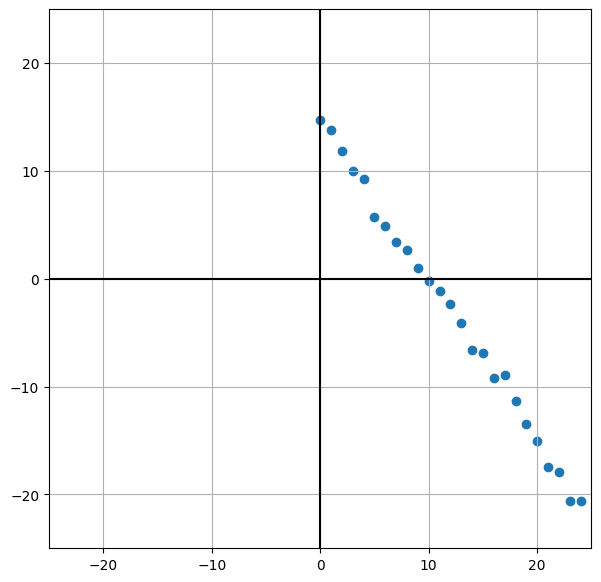

In [ ]:
# ваши параметры по вариантам
a_orig = -1.5 # по формуле (-1)^n * 0.1 * n, n - номер в списке группы
b_orig = 15 # по формуле n*(-1)^(n+1), где n - номер в списке группы
random_state = 15 # х, где х - номер в списке группы

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])

np.random.seed(random_state)

A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)

In [ ]:
A, y

(array([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.],
        [12.,  1.],
        [13.,  1.],
        [14.,  1.],
        [15.,  1.],
        [16.,  1.],
        [17.,  1.],
        [18.,  1.],
        [19.,  1.],
        [20.,  1.],
        [21.,  1.],
        [22.,  1.],
        [23.,  1.],
        [24.,  1.]]),
 array([ 14.68767152,  13.83928471,  11.84409147,   9.99821033,
          9.23556889,   5.73639474,   4.90413796,   3.41223426,
          2.69482995,   1.02625163,  -0.20059454,  -1.14480323,
         -2.31048228,  -4.08941032,  -6.56497844,  -6.90060931,
         -9.16293631,  -8.8997855 , -11.3183728 , -13.4851199 ,
        -15.08777963, -17.48211784, -17.87830952, -20.63743729,
        -20.65099742]))

### Вопрос - зачем был дописан вектор единиц справа к иксу?

ответ - чтобы учесть свободный коэффициент b

In [ ]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат
a_b_analytical = np.linalg.inv(A.T @ A) @ A.T @ y
a_b_analytical

array([-1.47905578, 14.61126696])

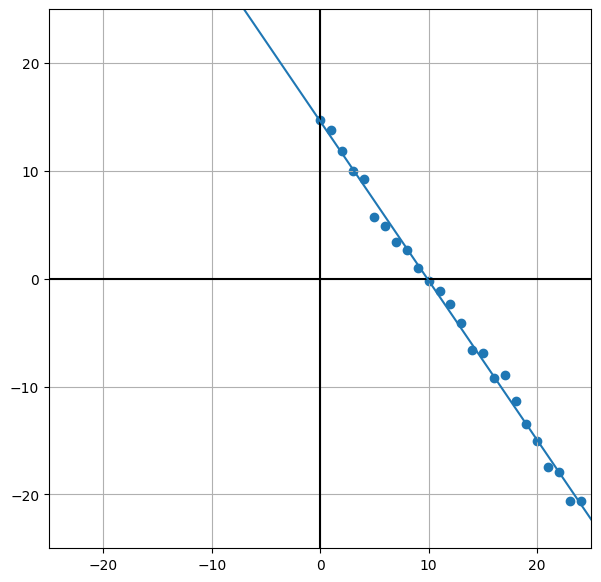

In [ ]:
# постройте линию которая вышла рядом с изначальными данными


# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# линия которая обучилась
# нужно вместо троеточий подсчитать значения y которые 
# получаются при полученных параметрах линии
# в точках x1 = -25, x2 = 25, этим мы построим линию по 2 точкам
ax.plot([-25, 25], [a_b_analytical[0]*-25 + a_b_analytical[1], a_b_analytical[0]*25 + a_b_analytical[1]])

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

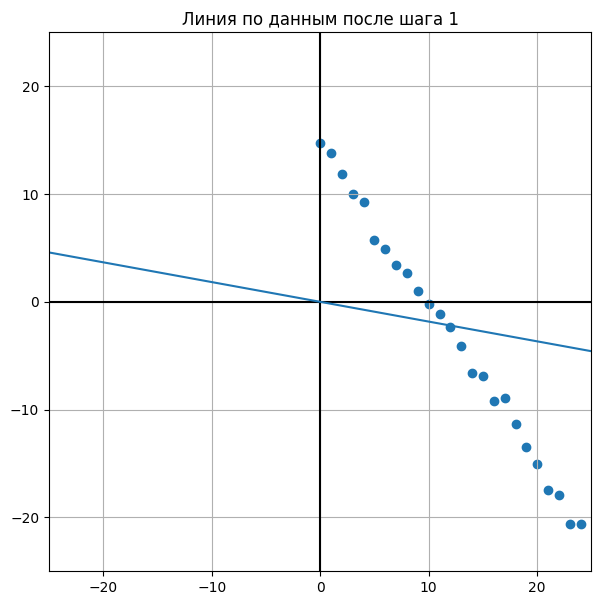

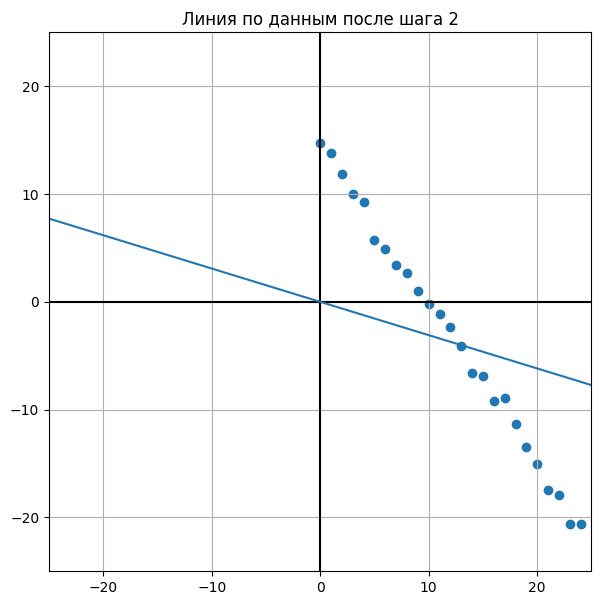

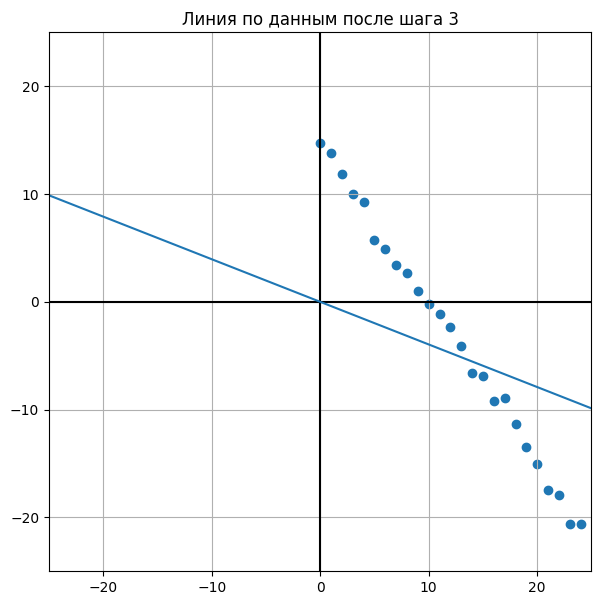

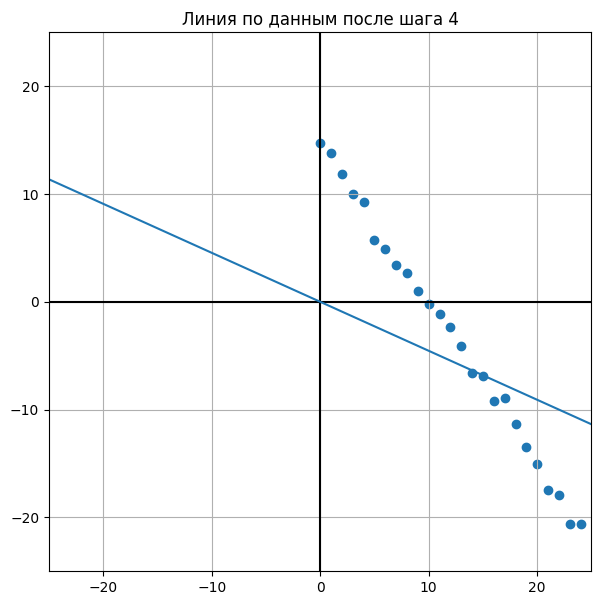

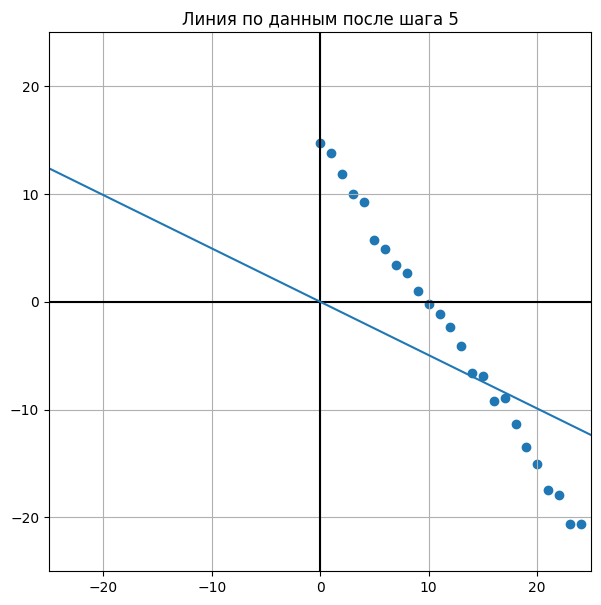

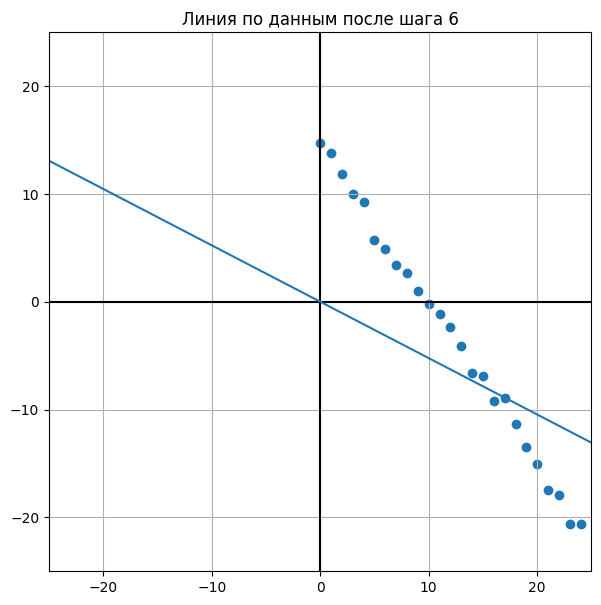

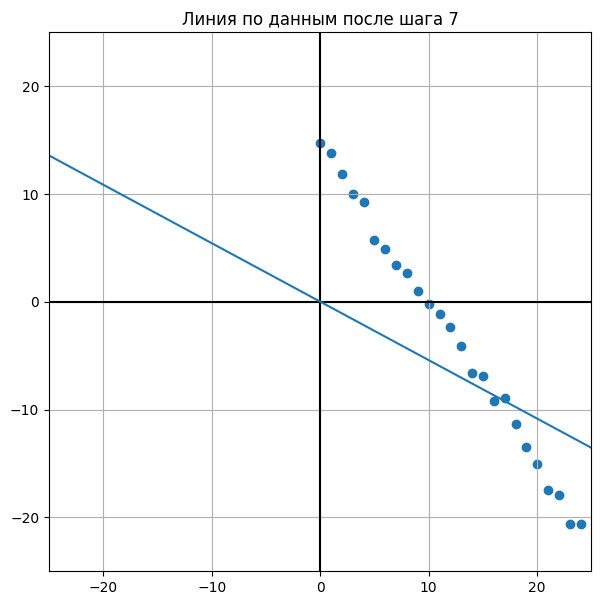

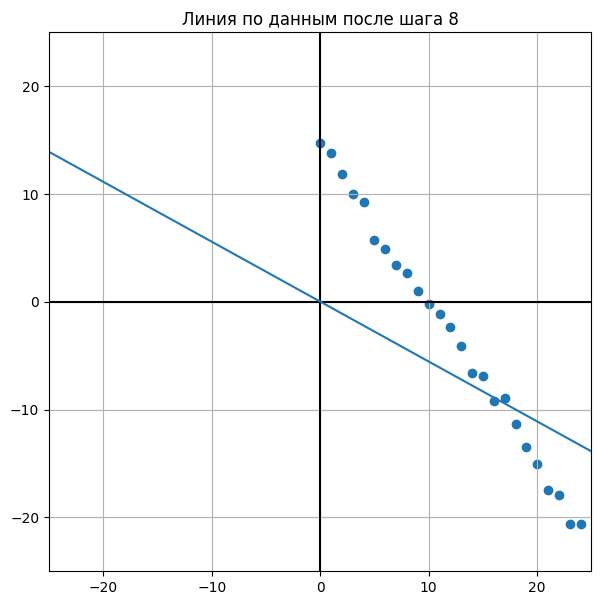

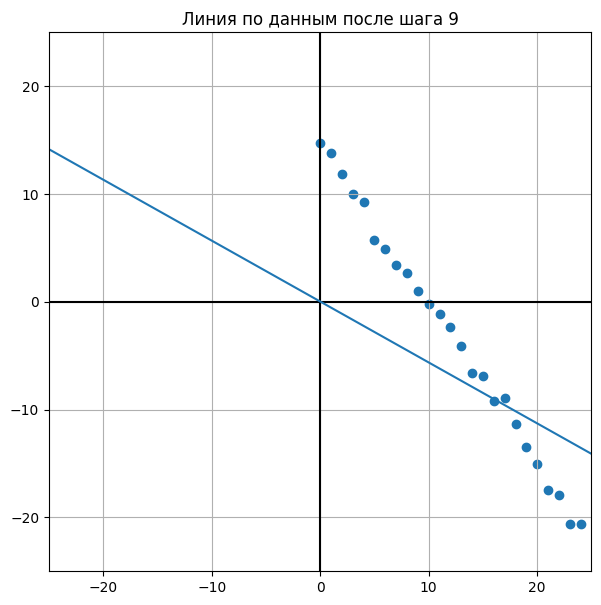

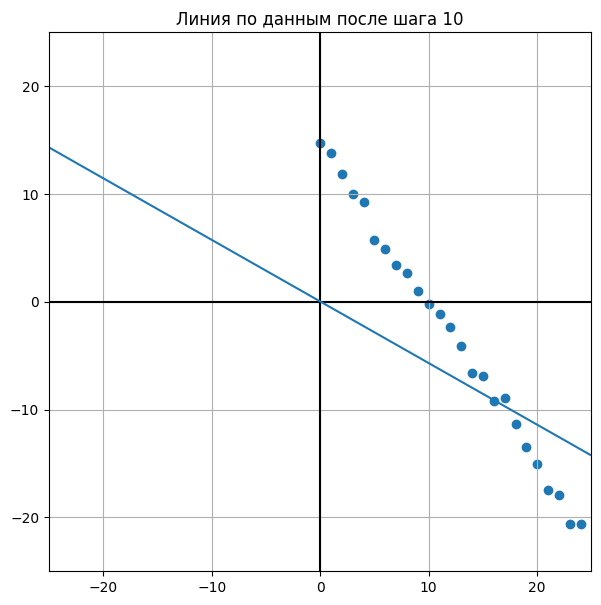

In [ ]:
alpha = 0.000032

a_b_analytical = np.array([0, 0], dtype = float)

for i in range(10):
    # получаем градиент
    grad = 2*A.T@(A @ a_b_analytical - y)
    # получаем антиградиент
    antigrad = - grad
    # обновляем наши параметры линии
    a_b_analytical += alpha * antigrad
    
    # рисуем результат текущего шага
    #  - изначальные данные
    f, ax = plt.subplots(figsize=(7, 7))

    plt.scatter(A[:, 0], y)
    ax.set_xlim(-25, 25)
    ax.set_ylim(-25, 25)
    ax.axvline(0, color='black')
    ax.axhline(0, color='black')
    ax.grid(True)

    # - линия которая обучилась
    ax.plot([-25, 25], [a_b_analytical[0]*-25 + a_b_analytical[1], a_b_analytical[0]*25 + a_b_analytical[1]])
    ax.set_title(f'Линия по данным после шага {i+1}')
    plt.show()